In [374]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

#Import models 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [375]:
data = pa.read_csv('50-Startups.csv')
data.replace(0, np.nan, inplace=True)

In [376]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [377]:
print(data.shape)
print(data.info())

(50, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          48 non-null float64
Administration     50 non-null float64
Marketing Spend    47 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


#### Fill the missing values ( 0 values)

In [378]:
data.groupby('State')['Marketing Spend'].mean()

State
California    226082.179583
New York      222838.373043
Name: Marketing Spend, dtype: float64

In [379]:
data['R&D Spend'].iloc[47] = (1000+1315+542)/3
data['R&D Spend'].iloc[49] = (952+542)/2

data['Marketing Spend'].iloc[19] = 222838.37
data['Marketing Spend'].iloc[47] = 226082.17
data['Marketing Spend'].iloc[48] = 222838.37

#### EDA 

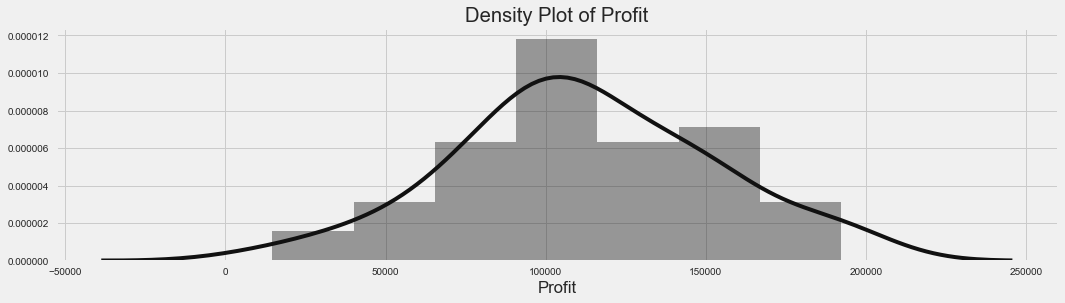

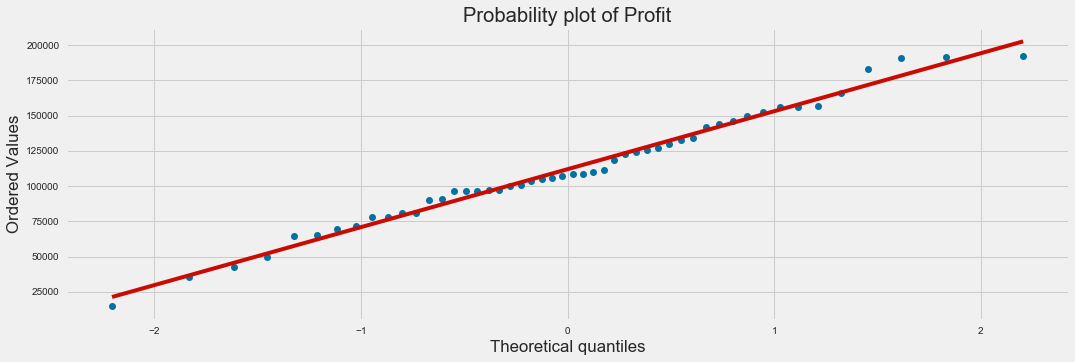

In [380]:
fig, (axis1) = plt.subplots(1,1,figsize=(16,4))


plt.figure(figsize=(16,5))
sn.distplot(data['Profit'],color='k',label='Skewness : %.2f'%data['Profit'].skew(),ax=axis1).set_title("Density Plot of Profit")
plt.ylabel("Frequency")
#plt.legend(loc='best')

stats.probplot(data.Profit,plot=plt)
plt.title("Probability plot of Profit")
plt.show()

From the above plot we can conclude that profit(our target variable) is normally distributed
(u can also use a normality test to be more sure )

In [381]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


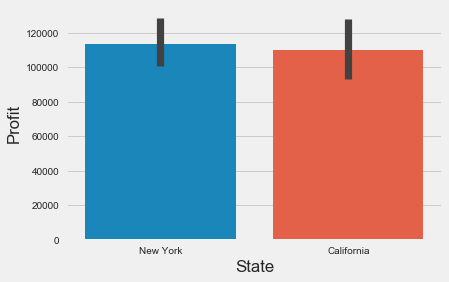

In [382]:
sn.barplot(x='State',y='Profit',data=data)

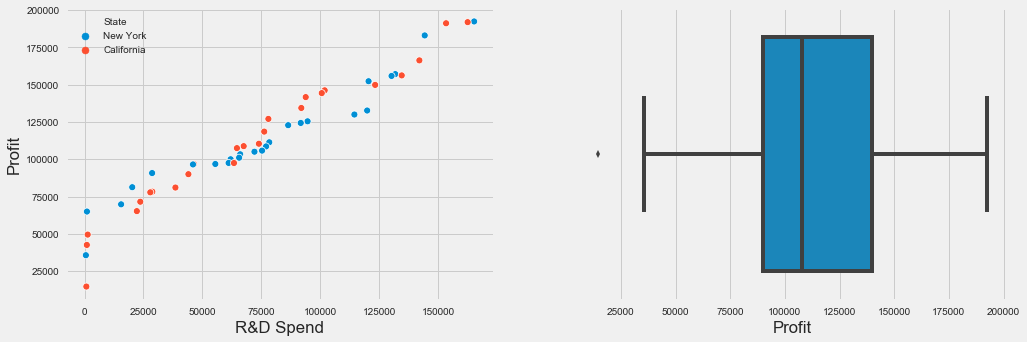

In [383]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sn.scatterplot(x='R&D Spend',y='Profit',hue='State',data=data,ax=axis1)
sn.boxplot(data['Profit'],ax=axis2)

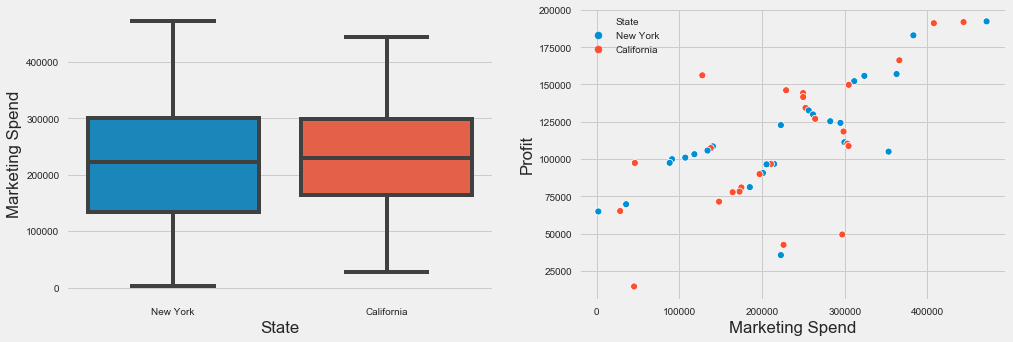

In [384]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))


sn.boxplot(x='State',y='Marketing Spend',data=data,ax=axis1)
sn.scatterplot(x='Marketing Spend',y='Profit',hue='State',data=data,ax=axis2)

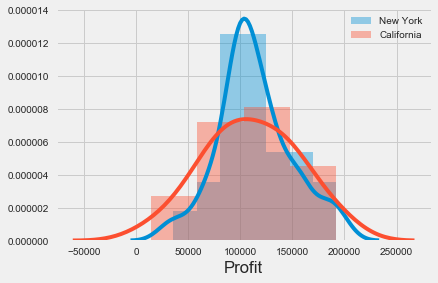

In [385]:
sn.distplot(data.Profit[data['State']=='New York'],label='New York')
sn.distplot(data.Profit[data['State']=='California'],label='California')
plt.legend()

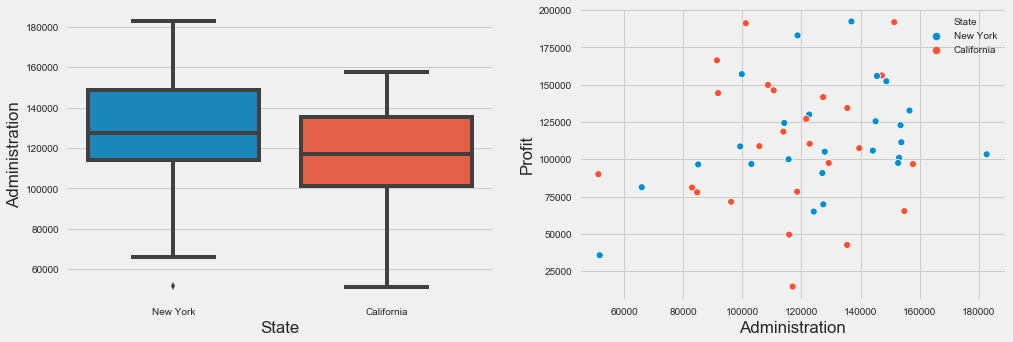

In [386]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sn.boxplot(x='State',y='Administration',data=data,ax=axis1)
sn.scatterplot(x='Administration',y='Profit',hue='State',data=data,ax=axis2)

In [387]:
## Pairplot 

In [388]:
numerical_features = list(data.columns)
numerical_features.remove('State')

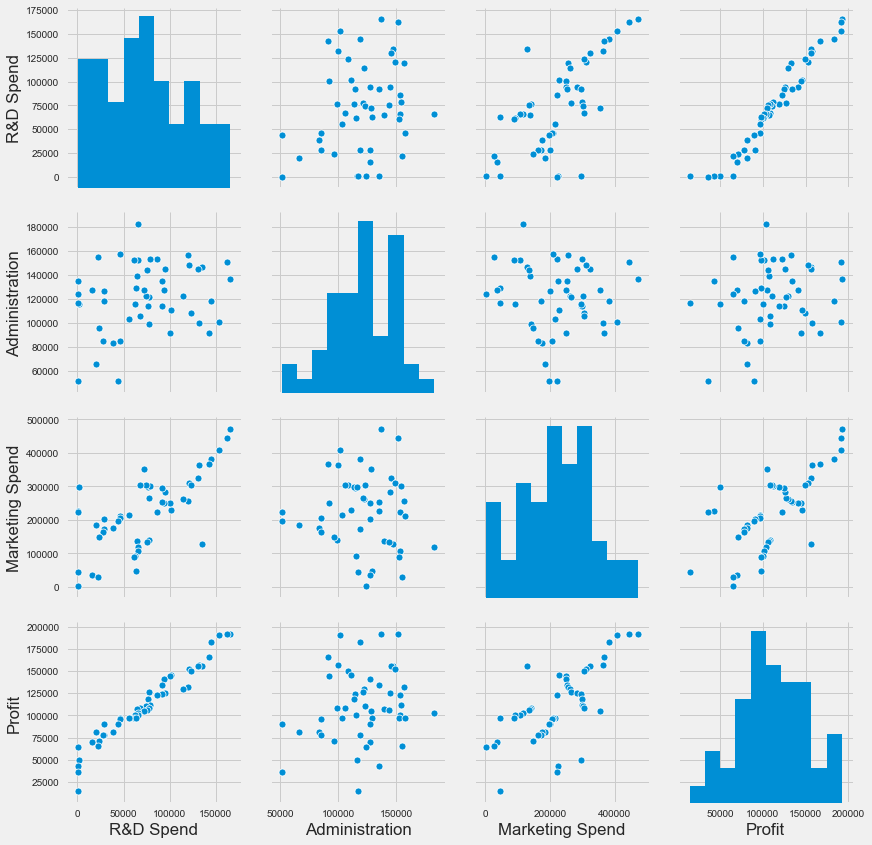

In [389]:
sn.pairplot(data[numerical_features],size=3)

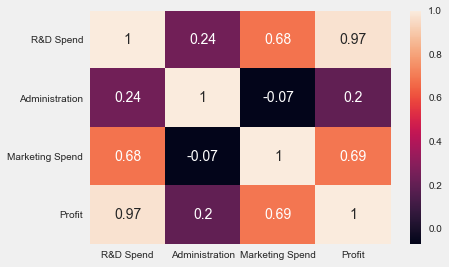

In [390]:
# Pearson corelation coefficent (Only used in Numerical Features)
corr = data.corr()
sn.heatmap(corr,annot=True)

**Marketing spend and R&D has a moderate corelation.(I will not remove them (VIF can be used to check multicolinearity but as the no. of features is low I am not remving it))**

- Profit and R&D has a strong +ve corelation 
- Profit and Marketing has a moverate +ve corelation 

In [391]:
features = list(data.columns)
features.remove('Profit')
numerical_features.remove('Profit')

In [392]:
## Build a Ols model First
encoded_data = pa.get_dummies(data[features],columns=['State'],drop_first=False)
features = list(encoded_data.columns)

X = sm.add_constant(encoded_data)
Y = data['Profit']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [393]:
#Build OLS Model
ols_model = sm.OLS(Y_train,X_train).fit()
ols_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       0.946     
Dependent Variable:    Profit             AIC:                  852.8090  
Date:                  2020-03-09 03:39   BIC:                  861.2534  
No. Observations:      40                 Log-Likelihood:       -421.40   
Df Model:              4                  F-statistic:          173.1     
Df Residuals:          35                 Prob (F-statistic):   1.54e-22  
R-squared:             0.952              Scale:                9.4667e+07
--------------------------------------------------------------------------
                   Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------------
const            36698.6690 5686.5824  6.4536 0.0000 25154.2930 48243.0451
R&D Spend            0.8233    0.0485 16.9748 0.0000     0.7248     0.9217
Administration      -0.0767    0.0607 -1.2647 0.2143    -0.1999     0.0464
Marketing Spend      0.0244    0.0211  1.1568 0.2552    -0.0184     0.0673
State_California 18642.3569 3001.7589  6.2105 0.0000 12548.4622 24736.2515
State_New York   18056.3122 3495.9421  5.1649 0.0000 10959.1724 25153.4519
--------------------------------------------------------------------------
Omnibus:           15.162     Durbin-Watson:        1.701                 
Prob(Omnibus):     0.001      Jarque-Bera (JB):     20.431                
Skew:              -1.102     Prob(JB):             0.000                 
Kurtosis:          5.720      Condition No.:        2015447144848276324352
==========================================================================
* The condition number is large (2e+21). This might indicate
strong multicollinearity or other numerical problems.
"""

**Marketing Spend and Administration is not significant pvalue>0.05** This 2 features can be removed as they is not a significant relation with our target variable.(OR VIF can be used to find multicolinearity and remove accordinly)

### Build Model with cross_validation

In [394]:
## Scale the data
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(encoded_data)
Y_scaled = np.array((data['Profit'] - data['Profit'].mean())/data['Profit'].std())

In [395]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y_scaled,test_size = 0.2,random_state=42)

In [396]:
linreg = LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Cross_Validation

In [397]:
def r2_cross_val(model):
    n_folds = 4
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(X_train)
    r2_train = np.sqrt(cross_val_score(model,X_train,Y_train,scoring='r2',cv=kf))
    return(r2_train)

In [398]:
r2_cross_val(linreg)

array([0.98226593, 0.96661751, 0.97221464, 0.93528749])

From the above we can conclude our model is not overfitting if it's overfitting then the variation in the values wil be higher

#### RMSE TRAIN TEST

In [399]:
Y_train_pred = linreg.predict(X_train)
rmse_train = (np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)))
print('RMSE TRAIN = ',rmse_train)
Y_test_pred = linreg.predict(X_test)
rmse_test = (np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)))
print('RMSE TEST = ',rmse_test)

RMSE TRAIN =  0.22580449844624598
RMSE TEST =  0.24025949721463474


#### Check if residuals are normally distributed

In [400]:
from yellowbrick.regressor import ResidualsPlot

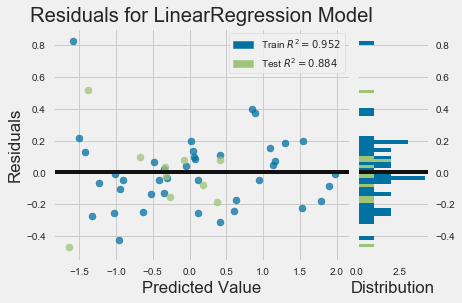

In [401]:
visualizer = ResidualsPlot(linreg)
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show() 

#### The residuals are normally distributed means our model is correct.(Homoscedasticity)